In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import warnings 
warnings.filterwarnings("ignore")

In [7]:
df = tf.keras.datasets.mnist
(train_images, train_labels) , (test_images , test_labels) = df.load_data()

class_names = ['0','1','2','3','4','5','6','7','8','9']

In [8]:

train_images = tf.keras.utils.normalize(train_images, axis= 1)
test_images = tf.keras.utils.normalize(test_images, axis= 1)

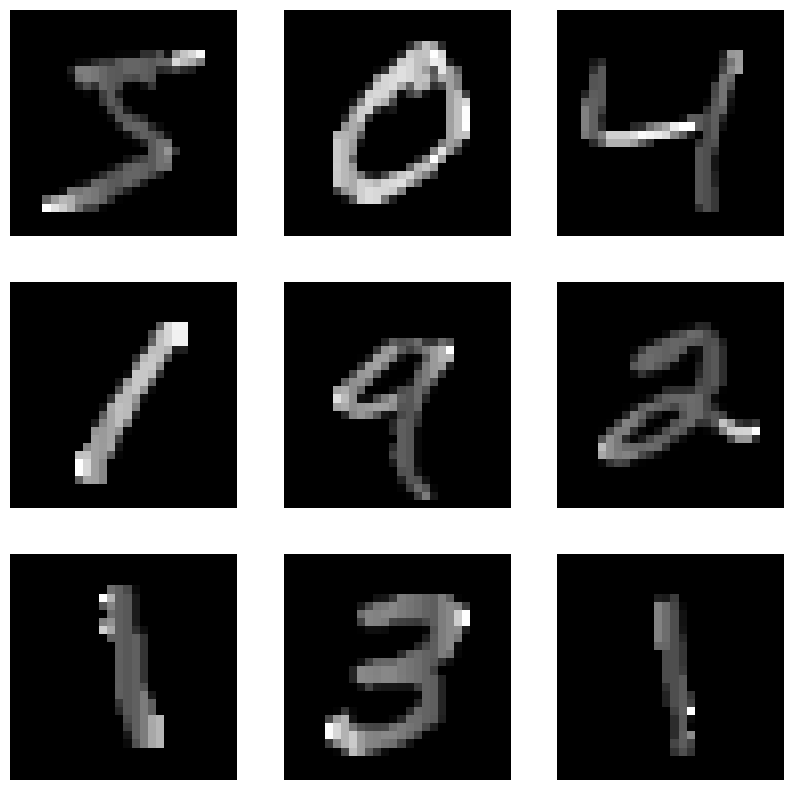

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].squeeze(), cmap='gray')
    
    plt.axis("off")

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )

#train the model
history = model.fit(train_images,train_labels, epochs=10 , validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8371 - loss: 0.5500 - val_accuracy: 0.9599 - val_loss: 0.1341
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9515 - loss: 0.1604 - val_accuracy: 0.9642 - val_loss: 0.1134
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9622 - loss: 0.1223 - val_accuracy: 0.9726 - val_loss: 0.0936
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9656 - loss: 0.1043 - val_accuracy: 0.9728 - val_loss: 0.0894
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9725 - loss: 0.0851 - val_accuracy: 0.9742 - val_loss: 0.0821
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9753 - loss: 0.0747 - val_accuracy: 0.9753 - val_loss: 0.0850
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9767 - loss: 0.0713 - val_accuracy: 0.9753 - val_loss: 0.0848
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9796 - loss: 0.0606 - 

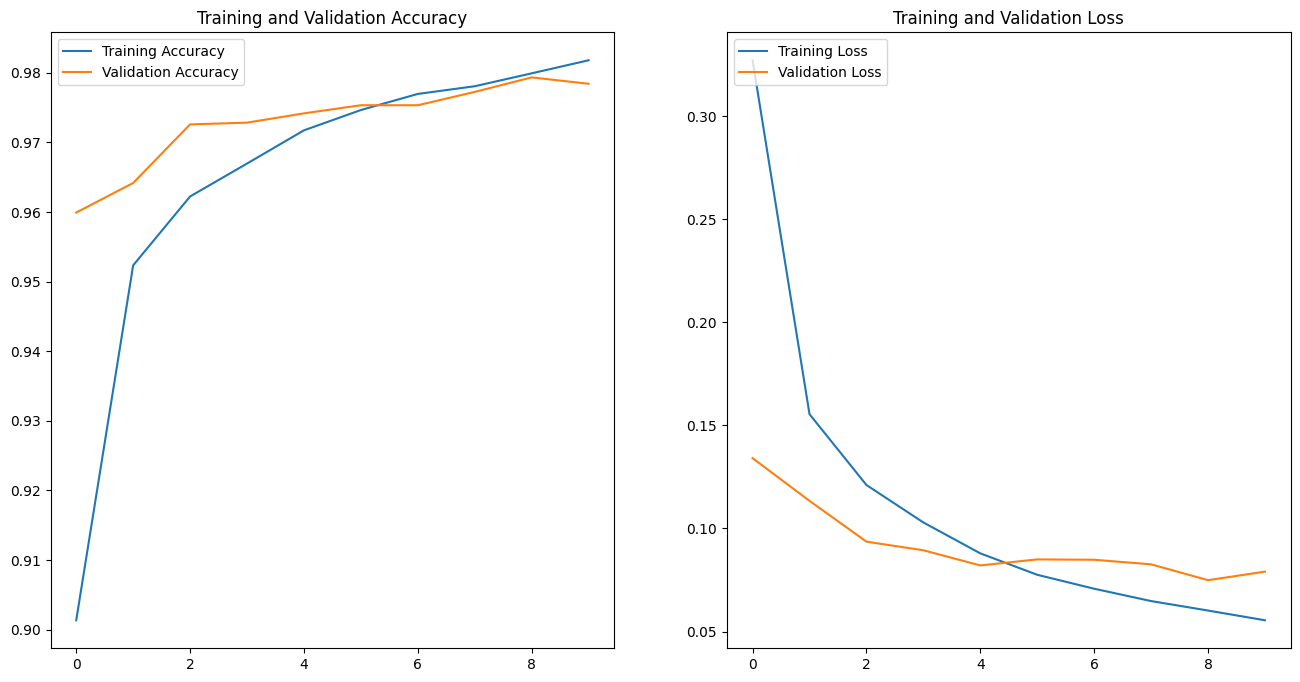

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4


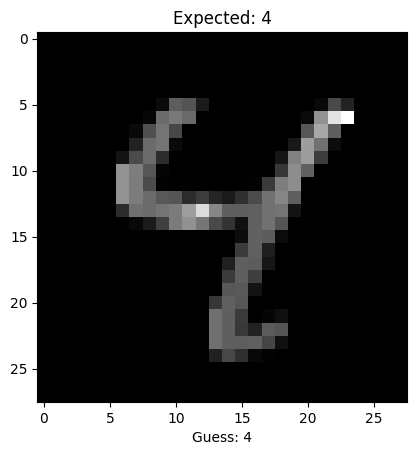

In [20]:
pred = int(input("Choose a number honey : "))
label = str(class_names[test_labels[pred]])
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[pred])])
guess = class_names[np.argmax(predictions[pred])]

# PREDECTION
plt.figure(1)
plt.imshow(test_images[pred] , cmap='gray')
plt.title("Expected: " + label)
plt.xlabel("Guess: " + guess)
plt.grid(False)